##Error e incertidumbre en cálculos numúericos
Trabajo Junto Ciro Gelvez

In [1]:
%pylab inline
import math
import numpy


Populating the interactive namespace from numpy and matplotlib


#a
Se define una funcion que calcula el sin(x), a partir de la serie de McLaurin, como parametros le entran la variable x, y el numero de terminos a calcular.

In [2]:
def numsin(x, orden):
    term=x
    total=term
    for n in range(2, orden):
        term*=-x**2/((2*n-1)*(2*n-2))
        total+=term
    return total


#b
ahora se define linspace(0.,45,100) y apartir de este se calculamos y graficamos los resultados

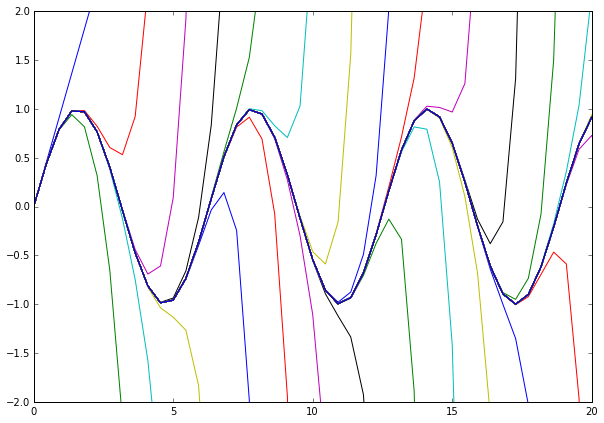

In [3]:
#plt.xkcd() #se configura el estilo 
D=np.linspace(0.,45,100) #se define los puntos sobres los que se evaluara numsin y el sin(x)
senMC, s=subplots(1, 1, figsize=(10, 7))
s.set_xlim(0, 20)
s.set_ylim(-2, 2)
numsin=vectorize(numsin)
#se hacen iteracion pintando cambiando el orden segun varia i
for i in range(2, 100):
    s.plot(D, numsin(D, i))
s.plot(D, sin(D)) #graficamos el sin "real" para ver como los terminos van convergiendo a el 

ahora vamos a calcular cuantos terminos se necesitan para que la diferencia entre el sin "real" y el numerico sea menor a 0.01, para cada uno de los numeros del linspace
al hacerlo por primera ves se observa que para numeros grandes el linspace esa diferencia se hace consatante, y esto ocurre para numeros muy pequeños que alfinal se aproximan a 0, y de esta manera no contibuyen y despues de cierto termino, esa diferncia es igual para todos, para solucionar esto, se identifica que se estan repitiendo y se para la busqueda del numero de terminos, acontinuacion el codigo que busca ese numero de terminos para cada uno de los numeros del linspace, y guarda en una lista el numero de terminos correspondiente:

In [4]:
numD=[] #lista donde se encuentran cada uno de los numeros para los cuales se hizo el calculo de terminos
term=[] #numero de terminos de la serie de MacLaurin que se requirieron para que se cumpliera la condicion
for i in range(0,len(D)):#recorro los numeros del linspace
    parar=False
    n=1
    #print i
    while(parar==False):#para ir aumentando el numero de terminos si se requiere 
        p=abs(sin(D[i])-numsin(D[i],n))
        #print n
        #print p
        if(p<0.01):#condicion del enunciado
            numD.append(D[i])
            term.append(n)
            parar=True
        if (p==abs(sin(D[i])-numsin(D[i],(n+20)))):#solucion al problema, mira si se estan repitiendo los resultados
            parar=True
            numD.append(D[i])
            term.append(n)
        
        n+=1
            

a continuacion vamos graficar el numero de terminos en funcion del numero del linspace, y encontramos en la grafica un salto, que es donde se empiezan a repetir la diferencia, ademas de esto se mostrara en la pantalla una lista de strings donde se muentra el numero de terminos con el numero del linspace correspondiente  

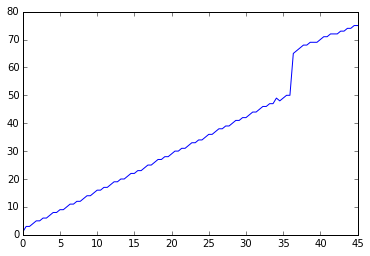

[('Para el numero ', 1, 'con el valor de', 0.0, 'se necesitaron', 1), ('Para el numero ', 2, 'con el valor de', 0.45454545454545453, 'se necesitaron', 1), ('Para el numero ', 3, 'con el valor de', 0.90909090909090906, 'se necesitaron', 3), ('Para el numero ', 4, 'con el valor de', 1.3636363636363635, 'se necesitaron', 3), ('Para el numero ', 5, 'con el valor de', 1.8181818181818181, 'se necesitaron', 4), ('Para el numero ', 6, 'con el valor de', 2.2727272727272725, 'se necesitaron', 5), ('Para el numero ', 7, 'con el valor de', 2.7272727272727271, 'se necesitaron', 5), ('Para el numero ', 8, 'con el valor de', 3.1818181818181817, 'se necesitaron', 6), ('Para el numero ', 9, 'con el valor de', 3.6363636363636362, 'se necesitaron', 6), ('Para el numero ', 10, 'con el valor de', 4.0909090909090908, 'se necesitaron', 7), ('Para el numero ', 11, 'con el valor de', 4.545454545454545, 'se necesitaron', 8), ('Para el numero ', 12, 'con el valor de', 5.0, 'se necesitaron', 8), ('Para el numero 

In [5]:
plt.plot(numD,term)
plt.show()
rta=[]
aa=2
for i in range(0,100):
    x="Para el numero ",i+1,"con el valor de", D[i],"se necesitaron", term[i]
    rta.append(x)
    

print rta

#Conclusión
como se ve claramente en la grafica, conforme el numero en el que evaluamos el sin "real" y el numerico, se necesitan mas terminos para que se ajuste de una mejor manera, y es por esto que en la teoria, la serie de Maclaurin suma hasta el infinito, pero esto significaria iterar infinitamente y seria un proceso que nunca acabaria , lo que se puede lograr es calcular hasta numeros muy grandes, para lograr una diferencia despreciable.